In [2]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Imports

In [3]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import yfinance as yf

/Users/aryanlangeh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Start and End Dates

In [4]:
start = datetime.datetime(2020, 1, 1) # format in yyyy, mm, dd
end = datetime.datetime(2023, 8, 20)

# Code

Function to get stock data

In [5]:
stocks = ["MRNA", "PFE", "JNJ", "GOOGL", 
          "META", "AAPL", "COST", "WMT", "KR", "JPM", 
          "BAC", "HSBC"]
portfolio = yf.download(stocks, start="2020-01-01", end="2023-08-21")['Adj Close']

[*********************100%%**********************]  12 of 12 completed


In [6]:
portfolio

,AAPL,BAC,COST,GOOGL,HSBC,JNJ,JPM,KR,META,MRNA,PFE,WMT
Date,,,,,,,,,,,,
2020-01-02,73.249023,32.531406,276.085876,68.433998,33.379887,132.136688,125.942886,26.513746,209.779999,19.230000,32.239513,112.085152
2020-01-03,72.536903,31.855951,276.313202,68.075996,32.862690,130.606857,124.280884,26.550755,208.669998,18.889999,32.066540,111.095642
2020-01-06,73.114891,31.810305,276.388977,69.890503,32.752483,130.443909,124.182068,26.643257,212.600006,18.129999,32.025345,110.869484
2020-01-07,72.771027,31.600370,275.953308,69.755501,32.506596,131.240433,122.070915,26.448992,213.059998,17.780001,31.918272,109.842308
2020-01-08,73.941628,31.919840,279.116791,70.251999,32.430294,131.222427,123.023186,26.291721,215.220001,17.980000,32.173615,109.465370
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-14,179.460007,30.674379,560.411072,131.330002,39.779999,172.189819,154.770004,48.560001,306.190002,100.000000,36.070000,160.000000
2023-08-15,177.449997,29.692562,557.456726,129.779999,38.619999,171.693420,150.830002,47.950001,301.950012,96.410004,35.389999,159.179993
2023-08-16,176.570007,29.047934,557.995667,128.699997,37.990002,171.147385,150.190002,47.020000,294.290009,98.919998,35.480000,159.259995


In [7]:
portfolio.to_csv("portfolio.csv", index=False)

In [8]:
portfolio = pd.read_csv("portfolio.csv")

Mean variance optimization (modern portfolio theory) doesn't work very well. The goal of MV optimization is to find portfolios that optimally diversify risk without reducing expected return and to facilitate portfolio construction. Basically for a given level of risk, get the highest possible return. Mean variance optimization doesn’t perform very well since it makes many simplifying assumptions, such as returns being normally distributed and the need for an invertible covariance matrix. Fortunately, methods like HRP and mCVAR address these limitations. 

Come back to this

# MVO - Mean Variance Optimization

In [9]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
from pypfopt import HRPOpt

In [11]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


mu = mean_historical_return(portfolio)
S = CovarianceShrinkage(portfolio).ledoit_wolf()

In [12]:
S

,AAPL,BAC,COST,GOOGL,HSBC,JNJ,JPM,KR,META,MRNA,PFE,WMT
AAPL,0.121165,0.061165,0.053809,0.080949,0.034183,0.031553,0.056008,0.018102,0.099681,0.046887,0.031710,0.034055
BAC,0.061165,0.154627,0.032500,0.060549,0.079432,0.035268,0.126314,0.013358,0.064866,0.008361,0.039712,0.026072
COST,0.053809,0.032500,0.068913,0.045715,0.017938,0.024322,0.029896,0.028656,0.050831,0.029599,0.024225,0.038938
GOOGL,0.080949,0.060549,0.045715,0.117288,0.034105,0.027032,0.053859,0.011362,0.110004,0.041717,0.030035,0.027376
HSBC,0.034183,0.079432,0.017938,0.034105,0.104468,0.020430,0.071834,0.006702,0.035027,0.000740,0.021567,0.012730
JNJ,0.031553,0.035268,0.024322,0.027032,0.020430,0.047214,0.032547,0.016159,0.025841,0.016916,0.033679,0.022980
JPM,0.056008,0.126314,0.029896,0.053859,0.071834,0.032547,0.128703,0.009901,0.056887,0.005120,0.037643,0.022814
KR,0.018102,0.013358,0.028656,0.011362,0.006702,0.016159,0.009901,0.094369,0.011114,0.010723,0.014678,0.030303
META,0.099681,0.064866,0.050831,0.110004,0.035027,0.025841,0.056887,0.011114,0.231565,0.058201,0.029355,0.027395
MRNA,0.046887,0.008361,0.029599,0.041717,0.000740,0.016916,0.005120,0.010723,0.058201,0.627032,0.045920,0.020167


In [13]:
mu

AAPL     0.270715
BAC     -0.032425
COST     0.205818
GOOGL    0.187276
HSBC     0.033860
JNJ      0.074184
JPM      0.047438
KR       0.175085
META     0.086410
MRNA     0.583279
PFE      0.036102
WMT      0.099266
dtype: float64

In [14]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
dict(cleaned_weights)

{'AAPL': 0.29354,
 'BAC': 0.0,
 'COST': 0.26256,
 'GOOGL': 0.0,
 'HSBC': 0.0,
 'JNJ': 0.0,
 'JPM': 0.0,
 'KR': 0.25644,
 'META': 0.0,
 'MRNA': 0.18746,
 'PFE': 0.0,
 'WMT': 0.0}

In [15]:
ef.portfolio_performance(verbose=True)

Expected annual return: 28.8%
Annual volatility: 26.0%
Sharpe Ratio: 1.03


(0.287743944699225, 0.25964177456196297, 1.031205187034833)

In [16]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(portfolio)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da.greedy_portfolio()
"Discrete allocation:", allocation

('Discrete allocation:', {'AAPL': 168, 'COST': 48, 'KR': 539, 'MRNA': 185})

In [17]:
"Funds remaining: ${:.2f}".format(leftover)

'Funds remaining: $137.96'

# HRP - Hierarchical Risk Parity

In [18]:
returns = portfolio.pct_change().dropna()


In [19]:
returns

,AAPL,BAC,COST,GOOGL,HSBC,JNJ,JPM,KR,META,MRNA,PFE,WMT
1,-0.009722,-0.020763,0.000823,-0.005231,-0.015494,-0.011578,-0.013196,0.001396,-0.005291,-0.017681,-0.005365,-0.008828
2,0.007968,-0.001433,0.000274,0.026654,-0.003354,-0.001248,-0.000795,0.003484,0.018834,-0.040233,-0.001285,-0.002036
3,-0.004703,-0.006600,-0.001576,-0.001932,-0.007507,0.006106,-0.017000,-0.007291,0.002164,-0.019305,-0.003343,-0.009265
4,0.016086,0.010110,0.011464,0.007118,-0.002347,-0.000137,0.007801,-0.005946,0.010138,0.011249,0.008000,-0.003432
5,0.021241,0.001716,0.016051,0.010498,0.006536,0.002966,0.003651,0.000704,0.014311,0.023359,-0.004352,0.010330
...,...,...,...,...,...,...,...,...,...,...,...,...
909,0.009393,-0.011505,-0.002647,0.013662,-0.008227,-0.002358,0.002072,-0.002670,0.015084,-0.014681,0.000832,-0.007444
910,-0.011200,-0.032008,-0.005272,-0.011802,-0.029160,-0.002883,-0.025457,-0.012562,-0.013848,-0.035900,-0.018852,-0.005125
911,-0.004959,-0.021710,0.000967,-0.008322,-0.016313,-0.003180,-0.004243,-0.019395,-0.025368,0.026035,0.002543,0.000503
912,-0.014555,-0.000341,-0.021358,0.009479,-0.001579,0.009397,-0.010387,-0.005955,-0.031262,0.073999,0.029030,-0.022416


In [20]:
hrp = HRPOpt(returns)
hrp_weights = hrp.optimize()
dict(hrp_weights)

{'AAPL': 0.07200234028767809,
 'BAC': 0.050360033937352146,
 'COST': 0.085798349778068,
 'GOOGL': 0.04927768160149862,
 'HSBC': 0.1231264778046757,
 'JNJ': 0.14234635528431897,
 'JPM': 0.04597942028946618,
 'KR': 0.1368306857653712,
 'META': 0.025229068616900344,
 'MRNA': 0.021308257730491983,
 'PFE': 0.0779932662473277,
 'WMT': 0.16974806265685102}

In [21]:
hrp.portfolio_performance(verbose=True)

Expected annual return: 16.0%
Annual volatility: 18.7%
Sharpe Ratio: 0.75


(0.15985365557873366, 0.18735095157190373, 0.7464795583120324)

In [22]:
initial_investment = 100000  # For example, your initial investment was $100,000

da_hrp = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=initial_investment)

allocation, leftover = da_hrp.greedy_portfolio()
"Discrete allocation (HRP):", allocation

('Discrete allocation (HRP):',
 {'WMT': 107,
  'JNJ': 83,
  'KR': 287,
  'HSBC': 326,
  'COST': 16,
  'PFE': 212,
  'AAPL': 41,
  'BAC': 175,
  'GOOGL': 39,
  'JPM': 31,
  'META': 9,
  'MRNA': 21})

In [23]:
"Funds remaining (HRP): ${:.2f}".format(leftover)

'Funds remaining (HRP): $5.23'

Backtesting HRP

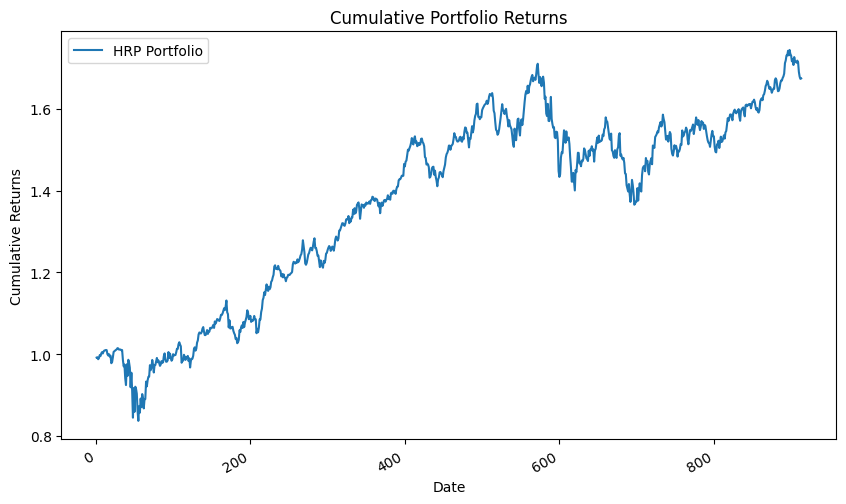

Portfolio would be worth: $167453.89 today.
AAPL:
  Initial Value: $7200.23
  Final Value: $17152.02
  Growth: 138.21%
BAC:
  Initial Value: $5036.00
  Final Value: $4469.11
  Growth: -11.26%
COST:
  Initial Value: $8579.83
  Final Value: $16902.99
  Growth: 97.01%
GOOGL:
  Initial Value: $4927.77
  Final Value: $9178.09
  Growth: 86.25%
HSBC:
  Initial Value: $12312.65
  Final Value: $13891.43
  Growth: 12.82%
JNJ:
  Initial Value: $14234.64
  Final Value: $18447.82
  Growth: 29.60%
JPM:
  Initial Value: $4597.94
  Final Value: $5438.62
  Growth: 18.28%
KR:
  Initial Value: $13683.07
  Final Value: $24549.66
  Growth: 79.42%
META:
  Initial Value: $2522.91
  Final Value: $3406.49
  Growth: 35.02%
MRNA:
  Initial Value: $2130.83
  Final Value: $11260.25
  Growth: 428.45%
PFE:
  Initial Value: $7799.33
  Final Value: $8868.72
  Growth: 13.71%
WMT:
  Initial Value: $16974.81
  Final Value: $23917.81
  Growth: 40.90%


In [24]:
portfolio_daily_returns = (hrp_weights * returns).sum(axis=1)
cumulative_returns = (1 + portfolio_daily_returns).cumprod()
# Individual Stock Cumulative Returns
individual_cumulative_returns = (1 + returns).cumprod()
sharpe_ratio = np.mean(portfolio_daily_returns) / np.std(portfolio_daily_returns)

# Calculate final value and % growth for each stock
individual_growth = {}
for stock, weight in hrp_weights.items():
    initial_value = initial_investment * weight
    final_value = initial_value * individual_cumulative_returns[stock].iloc[-1]
    growth_percent = ((final_value - initial_value) / initial_value) * 100
    individual_growth[stock] = {
        "Initial Value": initial_value,
        "Final Value": final_value,
        "Growth (%)": growth_percent
    }

final_portfolio_worth = initial_investment * cumulative_returns.iloc[-1]

# Visualization
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(cumulative_returns.index, cumulative_returns, label='HRP Portfolio')
ax1.set_title('Cumulative Portfolio Returns')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Returns')
ax1.legend(loc='upper left')

fig.autofmt_xdate()  # Rotate x labels for better visibility

plt.show()

print(f"Portfolio would be worth: ${final_portfolio_worth:.2f} today.")

# Print individual stock growth
for stock, metrics in individual_growth.items():
    print(f"{stock}:")
    print(f"  Initial Value: ${metrics['Initial Value']:.2f}")
    print(f"  Final Value: ${metrics['Final Value']:.2f}")
    print(f"  Growth: {metrics['Growth (%)']:.2f}%")

In [25]:
hrp.portfolio_performance(verbose=True)

Expected annual return: 16.0%
Annual volatility: 18.7%
Sharpe Ratio: 0.75


(0.15985365557873366, 0.18735095157190373, 0.7464795583120324)